In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import csv
import re

In [2]:
def input_pipeline(path: str) -> pd.DataFrame:

    column_types = {"ID": str, #0
                    "Customer_ID": str, #0
                    "Month": str, #1
                    "Name": str, #2
                    "Age": np.int16, #3
                    "SSN": str, #4
                    "Occupation": str, #5
                    "Annual_Income": np.float32, #6
                    "Monthly_Inhand_Salary": np.float32, #7
                    "Num_Bank_Accounts": np.int16, #8
                    "Num_Credit_Card": np.int16, #9
                    "Interest_Rate": np.float32, #10
                    "Num_of_Loan": np.int16, #11
                    "Type_of_Loan": str, #12
                    "Delay_from_due_date": np.int16, #13
                    "Num_of_Delayed_Payment": np.float16, #14
                    "Changed_Credit_Limit": str,#np.float32, 15
                    "Num_Credit_Inquiries": np.int16, #16
                    "Credit_Mix": str, #17
                    "Outstanding_Debt": np.float32, #18
                    "Credit_Utilization_Ratio": np.float32, #19
                    "Credit_History_Age": str, #20
                    "Payment_of_Min_Amount": str, #21
                    "Total_EMI_per_month": np.float32, #22
                    "Amount_invested_monthly": np.float32, #23
                    "Payment_Behaviour": str, #24
                    "Monthly_Balance": np.float32, #25
                    "Credit_Score": str} #26 dtype=column_types, 
    
    ofJedi = pd.read_csv(filepath_or_buffer=path, on_bad_lines="skip", low_memory=False)
    ofJedi.fillna(value=0, axis=0, inplace=True)

    ofJedi["Age"] = ofJedi["Age"].str.replace(pat=r"_*", repl="", regex=True)
    ofJedi["Annual_Income"] = ofJedi["Annual_Income"].str.replace(pat=r"_*", repl="", regex=True)
    ofJedi["Num_of_Loan"] = ofJedi["Num_of_Loan"].str.replace(pat=r"_*", repl="", regex=True)
    ofJedi["Num_of_Delayed_Payment"] = ofJedi["Num_of_Delayed_Payment"].str.replace(pat=r"_*", repl="", regex=True)
    ofJedi["Amount_invested_monthly"] = ofJedi["Amount_invested_monthly"].str.replace(pat=r"_*", repl="", regex=True)
    #ofJedi["Changed_Credit_Limit"] = ofJedi["Changed_Credit_Limit"].str.replace(pat=r"_*", repl="", regex=True)
    #ofJedi["Changed_Credit_Limit"] = ofJedi["Changed_Credit_Limit"].str.replace(pat="0-", repl="-")
    #ofJedi["Changed_Credit_Limit"] = ofJedi["Changed_Credit_Limit"].str.replace(pat="", repl="0")
    ofJedi["Monthly_Balance"] = ofJedi["Monthly_Balance"].str.replace(pat=r"_*", repl="", regex=True)
    ofJedi["Outstanding_Debt"] = ofJedi["Outstanding_Debt"].str.replace(pat=r"_*$", repl="", regex=True)

    ofJedi = ofJedi.astype(dtype=column_types)
    ofJedi.drop(columns=["ID", "Customer_ID", "Name", "SSN", "Month", "Occupation"], inplace=True)

    return ofJedi

In [3]:
def count_null_rows(df):
    for col in df.columns:
        na_sum = df[col].isna().sum()
        sum = len(df)
        
        if na_sum > 0:
            print("{0}:\t{1}".format(col, (na_sum/sum)))

In [4]:
def check_objects_per(df: pd.DataFrame) -> None:
    count_rows = len(df)
    for col in df.columns:
        if df[col].dtype == object:
            print(col)
            print(df[col].value_counts()/count_rows)
            print("\n")

In [5]:
def age_cleaner(df: pd.DataFrame, min_age: int, max_age: int) -> pd.DataFrame:
    return df.query("Age >= @min_age & Age <= @max_age")

In [6]:
def age_analysis(x: pd.Series) -> None:
    print(x.head())
    print("Stardard Deviation:\t{0}\nMean:\t{1}\nVariance:\t{2}\nMaximum:\t{3}\nMinimum:\t{4}".format(x.std(), x.mean(), x.var(), x.max(), x.min()))

    print(x.describe())

    print("\nLength over 80:\t{0}".format(len(x[x > 80])))
    print("\nLength under 18:\t{0}".format(len(x[x < 18])))

    print("\nPercentage over 80:\t{0}".format(len(x[x > 80])/len(x)))
    print("\nPercentage under 18:\t{0}".format(len(x[x < 18])/len(x)))

    sns.boxplot(x=x)
    sns.displot(data=x, kind="kde")
    plt.show()

In [7]:
def num_bank_accounts_analysis(x: pd.Series) -> None:
    print(x.describe())

    print("Lenght bank accounts bigger than 7 {0}".format(len(x[x > 7])))
    print("Percentage bank accounts bigger than 7 {0}".format(len(x[x > 7])/len(x)))

    print("Lenght bank accounts less than 1 {0}".format(len(x[x < 1])))
    print("Percentage bank accounts less than 1 {0}".format(len(x[x < 1])/len(x)))

    #sns.boxplot(x=x)
    #sns.displot(data=x, kind="kde")
    #plt.show()

    print("\nFiltered data:\n")

    print(x.where(cond=x.between(left=1, right=7)).describe())

    # print("Lenght bank accounts bigger than 7 {0}".format(len(x[x > 7])))
    # print("Percentage bank accounts bigger than 7 {0}".format(len(x[x > 7])/len(x)))

    # print("Lenght bank accounts less than 1 {0}".format(len(x[x < 1])))
    # print("Percentage bank accounts less than 1 {0}".format(len(x[x < 1])/len(x)))

    sns.boxplot(x=x.where(cond=x.between(left=1, right=7)).describe())
    sns.displot(data=x.where(cond=x.between(left=1, right=7)).describe(), kind="hist")
    plt.show()



In [8]:
def anual_income_analysis(x: pd.DataFrame) -> None:
    # Annual_Income", "Credit_Score" .apply(lambda i: format(i, "f"))
    print(x["Annual_Income"].describe().apply(lambda i: format(i, "f")))

    sns.boxplot(x=x["Annual_Income"].sample(frac=0.3).apply(lambda i: format(i, "f")), y=x["Credit_Score"], native_scale=True,
                ax=plt.subplots(figsize=(11.7, 8.27))[1])
    #sns.kdeplot(data=x["Annual_Income"].sample(frac=0.3), ax=plt.subplots(figsize=(11.7, 8.27))[1])
    #plt.show()

In [9]:
def generate_boxplot(df: pd.DataFrame) -> None:
    for col in df.columns:
        if df[col] != object:
            print(sns.boxplot(data=df[col]))

In [10]:
credit_df = input_pipeline(path="train.csv")
credit_df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.119141,1824.843384,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,...,_,809.97998,26.822620,22 Years and 1 Months,No,49.574947,80.415298,High_spent_Small_value_payments,312.494080,Good
1,23,19114.119141,0.000000,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,...,Good,809.97998,31.944960,0,No,49.574947,118.280220,Low_spent_Large_value_payments,284.629150,Good
2,-500,19114.119141,0.000000,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,...,Good,809.97998,28.609352,22 Years and 3 Months,No,49.574947,81.699524,Low_spent_Medium_value_payments,331.209869,Good
3,23,19114.119141,0.000000,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,...,Good,809.97998,31.377861,22 Years and 4 Months,No,49.574947,199.458069,Low_spent_Small_value_payments,223.451309,Good
4,23,19114.119141,1824.843384,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,...,Good,809.97998,24.797346,22 Years and 5 Months,No,49.574947,41.420155,High_spent_Medium_value_payments,341.489227,Good


In [11]:
for col in credit_df.columns:
    print("{0}:\t{1}".format(col, credit_df[col].isna().sum()))

Age:	0
Annual_Income:	0
Monthly_Inhand_Salary:	0
Num_Bank_Accounts:	0
Num_Credit_Card:	0
Interest_Rate:	0
Num_of_Loan:	0
Type_of_Loan:	0
Delay_from_due_date:	0
Num_of_Delayed_Payment:	7002
Changed_Credit_Limit:	0
Num_Credit_Inquiries:	0
Credit_Mix:	0
Outstanding_Debt:	0
Credit_Utilization_Ratio:	0
Credit_History_Age:	0
Payment_of_Min_Amount:	0
Total_EMI_per_month:	0
Amount_invested_monthly:	4479
Payment_Behaviour:	0
Monthly_Balance:	1200
Credit_Score:	0


In [12]:
len(credit_df)

100000

In [13]:
for col in credit_df.columns:
    na_sum = credit_df[col].isna().sum()
    sum = len(credit_df)

    if na_sum > 0 and credit_df[col].dtype==object:
        print("{0}:\t{1}".format(col, (na_sum/sum)))

In [14]:
credit_df[credit_df["Type_of_Loan"].isna() & credit_df["Credit_History_Age"].isna()]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


Type_of_Loan is too sparse, and too many nan values

In [15]:
credit_df["Type_of_Loan"].value_counts()

Type_of_Loan
0                                                                                                                                     11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

In [16]:
credit_df.drop(columns=["Type_of_Loan"], inplace=True)
credit_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.119141,1824.843384,3,4,3.0,4,3,7.0,11.27,...,_,809.979980,26.822620,22 Years and 1 Months,No,49.574947,80.415298,High_spent_Small_value_payments,312.494080,Good
1,23,19114.119141,0.000000,3,4,3.0,4,-1,NaN,11.27,...,Good,809.979980,31.944960,0,No,49.574947,118.280220,Low_spent_Large_value_payments,284.629150,Good
2,-500,19114.119141,0.000000,3,4,3.0,4,3,7.0,_,...,Good,809.979980,28.609352,22 Years and 3 Months,No,49.574947,81.699524,Low_spent_Medium_value_payments,331.209869,Good
3,23,19114.119141,0.000000,3,4,3.0,4,5,4.0,6.27,...,Good,809.979980,31.377861,22 Years and 4 Months,No,49.574947,199.458069,Low_spent_Small_value_payments,223.451309,Good
4,23,19114.119141,1824.843384,3,4,3.0,4,6,NaN,11.27,...,Good,809.979980,24.797346,22 Years and 5 Months,No,49.574947,41.420155,High_spent_Medium_value_payments,341.489227,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.988281,3359.415771,4,6,7.0,2,23,7.0,11.5,...,_,502.380005,34.663570,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866241,Poor
99996,25,39628.988281,3359.415771,4,6,7.0,2,18,7.0,11.5,...,_,502.380005,40.565632,31 Years and 7 Months,No,35.104023,54.185951,High_spent_Medium_value_payments,496.651611,Poor
99997,25,39628.988281,3359.415771,4,6,5729.0,2,27,6.0,11.5,...,Good,502.380005,41.255524,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809082,Poor
99998,25,39628.988281,3359.415771,4,6,7.0,2,20,NaN,11.5,...,Good,502.380005,33.638206,31 Years and 9 Months,No,35.104023,251.672577,Low_spent_Large_value_payments,319.164978,Standard


In [17]:
count_null_rows(df=credit_df)

Num_of_Delayed_Payment:	0.07002
Amount_invested_monthly:	0.04479
Monthly_Balance:	0.012


In [18]:
credit_df["Credit_History_Age"].value_counts()

Credit_History_Age
0                         9030
15 Years and 11 Months     446
19 Years and 4 Months      445
19 Years and 5 Months      444
17 Years and 11 Months     443
                          ... 
0 Years and 3 Months        20
0 Years and 2 Months        15
33 Years and 7 Months       14
33 Years and 8 Months       12
0 Years and 1 Months         2
Name: count, Length: 405, dtype: int64

In [19]:
count_null_rows(credit_df)

Num_of_Delayed_Payment:	0.07002
Amount_invested_monthly:	0.04479
Monthly_Balance:	0.012


In [20]:
credit_df.dropna(inplace=True)
credit_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.119141,1824.843384,3,4,3.0,4,3,7.0,11.27,...,_,809.979980,26.822620,22 Years and 1 Months,No,49.574947,80.415298,High_spent_Small_value_payments,312.494080,Good
2,-500,19114.119141,0.000000,3,4,3.0,4,3,7.0,_,...,Good,809.979980,28.609352,22 Years and 3 Months,No,49.574947,81.699524,Low_spent_Medium_value_payments,331.209869,Good
3,23,19114.119141,0.000000,3,4,3.0,4,5,4.0,6.27,...,Good,809.979980,31.377861,22 Years and 4 Months,No,49.574947,199.458069,Low_spent_Small_value_payments,223.451309,Good
5,23,19114.119141,0.000000,3,4,3.0,4,8,4.0,9.27,...,Good,809.979980,27.262259,22 Years and 6 Months,No,49.574947,62.430172,!@9#%8,340.479218,Good
6,23,19114.119141,1824.843384,3,4,3.0,4,3,8.0,11.27,...,Good,809.979980,22.537594,22 Years and 7 Months,No,49.574947,178.344070,Low_spent_Small_value_payments,244.565323,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.988281,3359.415771,4,6,7.0,2,20,6.0,9.5,...,_,502.380005,39.323570,31 Years and 5 Months,No,35.104023,140.581406,High_spent_Medium_value_payments,410.256165,Poor
99995,25,39628.988281,3359.415771,4,6,7.0,2,23,7.0,11.5,...,_,502.380005,34.663570,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866241,Poor
99996,25,39628.988281,3359.415771,4,6,7.0,2,18,7.0,11.5,...,_,502.380005,40.565632,31 Years and 7 Months,No,35.104023,54.185951,High_spent_Medium_value_payments,496.651611,Poor
99997,25,39628.988281,3359.415771,4,6,5729.0,2,27,6.0,11.5,...,Good,502.380005,41.255524,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809082,Poor


In [21]:
for col in credit_df.columns:
    if credit_df[col].dtype == object:
        print(col)
        print(credit_df[col].value_counts())
        print("\n")

Changed_Credit_Limit
Changed_Credit_Limit
_                     1848
11.5                   115
11.32                  115
8.22                   114
10.06                  112
                      ... 
0.6799999999999999       1
0.8999999999999999       1
31.9                     1
31.56                    1
3.6199999999999988       1
Name: count, Length: 4299, dtype: int64


Credit_Mix
Credit_Mix
Standard    32080
Good        21353
_           17804
Bad         16537
Name: count, dtype: int64


Credit_History_Age
Credit_History_Age
0                         7902
19 Years and 4 Months      402
19 Years and 5 Months      401
15 Years and 10 Months     393
17 Years and 10 Months     390
                          ... 
0 Years and 3 Months        19
33 Years and 7 Months       14
0 Years and 2 Months        13
33 Years and 8 Months       11
0 Years and 1 Months         2
Name: count, Length: 405, dtype: int64


Payment_of_Min_Amount
Payment_of_Min_Amount
Yes    45922
No     31342
NM     

In [22]:
credit_df[col].value_counts()

Credit_Score
Standard    46742
Poor        25447
Good        15585
Name: count, dtype: int64

In [23]:
credit_df["Credit_Score"].value_counts()/2

Credit_Score
Standard    23371.0
Poor        12723.5
Good         7792.5
Name: count, dtype: float64

In [24]:
check_objects_per(df=credit_df)

Changed_Credit_Limit
Changed_Credit_Limit
_                     0.021054
11.5                  0.001310
11.32                 0.001310
8.22                  0.001299
10.06                 0.001276
                        ...   
0.6799999999999999    0.000011
0.8999999999999999    0.000011
31.9                  0.000011
31.56                 0.000011
3.6199999999999988    0.000011
Name: count, Length: 4299, dtype: float64


Credit_Mix
Credit_Mix
Standard    0.365484
Good        0.243272
_           0.202839
Bad         0.188404
Name: count, dtype: float64


Credit_History_Age
Credit_History_Age
0                         0.090027
19 Years and 4 Months     0.004580
19 Years and 5 Months     0.004569
15 Years and 10 Months    0.004477
17 Years and 10 Months    0.004443
                            ...   
0 Years and 3 Months      0.000216
33 Years and 7 Months     0.000160
0 Years and 2 Months      0.000148
33 Years and 8 Months     0.000125
0 Years and 1 Months      0.000023
Name: count, L

In [25]:
credit_df.drop(index=credit_df[credit_df.Payment_Behaviour == "!@9#%8"].index, inplace=True)

In [26]:
credit_df.drop(index=credit_df[credit_df.Credit_Mix == "_"].index, inplace=True)

In [27]:
check_objects_per(df=credit_df)

Changed_Credit_Limit
Changed_Credit_Limit
_        0.021212
11.32    0.001330
8.22     0.001299
10.06    0.001283
11.49    0.001206
           ...   
-1.35    0.000015
-5.74    0.000015
-0.71    0.000015
-5.2     0.000015
21.17    0.000015
Name: count, Length: 4099, dtype: float64


Credit_Mix
Credit_Mix
Standard    0.45838
Good        0.30555
Bad         0.23607
Name: count, dtype: float64


Credit_History_Age
Credit_History_Age
0                         0.089951
19 Years and 4 Months     0.004700
19 Years and 5 Months     0.004654
15 Years and 11 Months    0.004515
17 Years and 11 Months    0.004499
                            ...   
0 Years and 3 Months      0.000186
33 Years and 7 Months     0.000170
33 Years and 8 Months     0.000139
0 Years and 2 Months      0.000139
0 Years and 1 Months      0.000031
Name: count, Length: 405, dtype: float64


Payment_of_Min_Amount
Payment_of_Min_Amount
Yes    0.522155
No     0.357854
NM     0.119991
Name: count, dtype: float64


Payment_Behaviou

In [28]:
len(credit_df)

64680

In [29]:
credit_df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [30]:
credit_df.reset_index(drop=True, inplace=True)
credit_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-500,19114.119141,0.000000,3,4,3.0,4,3,7.0,_,...,Good,809.979980,28.609352,22 Years and 3 Months,No,49.574947,81.699524,Low_spent_Medium_value_payments,331.209869,Good
1,23,19114.119141,0.000000,3,4,3.0,4,5,4.0,6.27,...,Good,809.979980,31.377861,22 Years and 4 Months,No,49.574947,199.458069,Low_spent_Small_value_payments,223.451309,Good
2,23,19114.119141,1824.843384,3,4,3.0,4,3,8.0,11.27,...,Good,809.979980,22.537594,22 Years and 7 Months,No,49.574947,178.344070,Low_spent_Small_value_payments,244.565323,Good
3,23,19114.119141,1824.843384,3,4,3.0,4,3,6.0,11.27,...,Good,809.979980,23.933794,0,No,49.574947,24.785217,High_spent_Medium_value_payments,358.124176,Standard
4,28,34847.839844,3037.986572,2,4,6.0,1,3,4.0,5.42,...,Good,605.030029,24.464031,26 Years and 7 Months,No,18.816216,104.291824,Low_spent_Small_value_payments,470.690613,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64675,28,20002.880859,1929.906616,10,8,29.0,5,33,25.0,23.31,...,Bad,3571.699951,39.772606,5 Years and 9 Months,Yes,12112.000000,148.275238,Low_spent_Small_value_payments,273.750671,Poor
64676,28,20002.880859,1929.906616,10,8,29.0,5,33,25.0,18.31,...,Bad,3571.699951,24.713861,5 Years and 10 Months,Yes,60.964771,76.282791,Low_spent_Small_value_payments,345.743103,Poor
64677,28,20002.880859,1929.906616,10,8,29.0,5,33,26.0,18.31,...,Bad,3571.699951,25.123535,0,Yes,60.964771,173.275497,Low_spent_Large_value_payments,228.750397,Standard
64678,29,20002.880859,1929.906616,10,8,29.0,5,33,25.0,18.31,...,Bad,3571.699951,37.140785,6 Years and 3 Months,Yes,60.964771,34.662907,High_spent_Large_value_payments,337.362976,Standard


Age analysis

0   -500
1     23
2     23
3     23
4     28
Name: Age, dtype: int16
Stardard Deviation:	687.6169485138109
Mean:	110.8547619047619
Variance:	472817.0678834449
Maximum:	8698
Minimum:	-500
count    64680.000000
mean       110.854762
std        687.616949
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

Length over 80:	1216

Length under 18:	4291

Percentage over 80:	0.018800247371675943

Percentage under 18:	0.06634199134199134


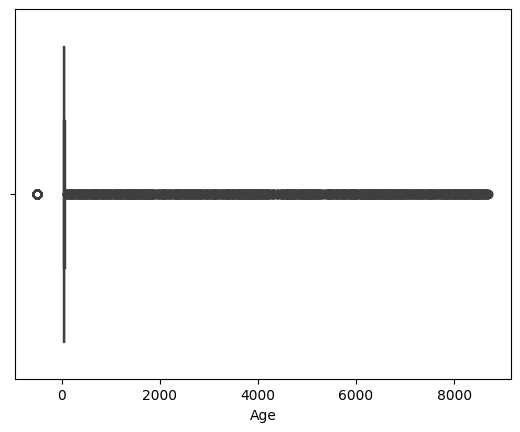

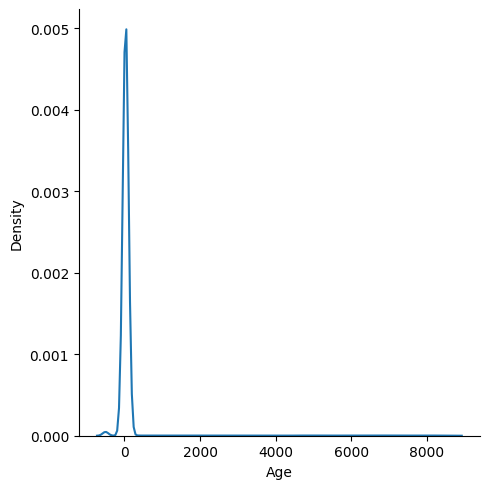

In [31]:
age_analysis(credit_df["Age"])

In [32]:
credit_df.groupby(by=["Credit_Score"]).agg({"Age": "mean"})

,Age
Credit_Score,
Good,120.048859
Poor,107.267809
Standard,109.754218


1    23
2    23
3    23
4    28
5    28
Name: Age, dtype: int16
Stardard Deviation:	10.118136062052868
Mean:	34.395636523414396
Variance:	102.37667737021471
Maximum:	56
Minimum:	18
count    59173.000000
mean        34.395637
std         10.118136
min         18.000000
25%         26.000000
50%         34.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

Length over 80:	0

Length under 18:	0

Percentage over 80:	0.0

Percentage under 18:	0.0


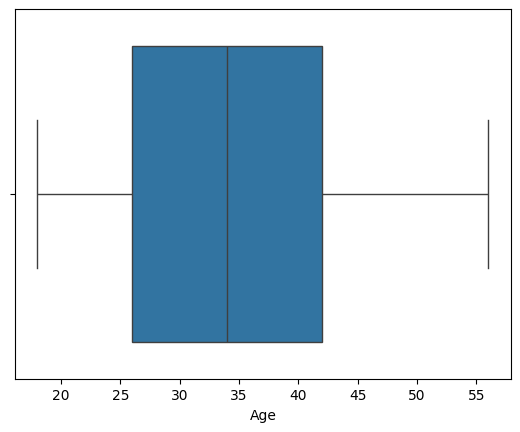

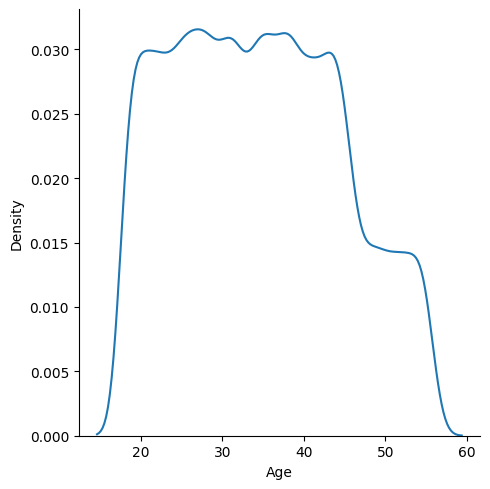

In [33]:
credit_df = age_cleaner(credit_df, 18, 80)
age_analysis(credit_df["Age"])

In [34]:
credit_df.groupby(by=["Credit_Score"]).agg({"Age": "mean"})

,Age
Credit_Score,
Good,36.551696
Poor,32.730711
Standard,34.520583


### Annual_Income Analysis

In [35]:
credit_df["Annual_Income"].dtype

dtype('float32')

In [36]:
# anual_income_analysis(x=credit_df.loc[:,["Annual_Income", "Credit_Score"]])

Monthly in hand salary

In [37]:
credit_df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,23,19114.119141,0.000000,3,4,3.0,4,5,4.0,6.27,...,Good,809.979980,31.377861,22 Years and 4 Months,No,49.574947,199.458069,Low_spent_Small_value_payments,223.451309,Good
2,23,19114.119141,1824.843384,3,4,3.0,4,3,8.0,11.27,...,Good,809.979980,22.537594,22 Years and 7 Months,No,49.574947,178.344070,Low_spent_Small_value_payments,244.565323,Good
3,23,19114.119141,1824.843384,3,4,3.0,4,3,6.0,11.27,...,Good,809.979980,23.933794,0,No,49.574947,24.785217,High_spent_Medium_value_payments,358.124176,Standard
4,28,34847.839844,3037.986572,2,4,6.0,1,3,4.0,5.42,...,Good,605.030029,24.464031,26 Years and 7 Months,No,18.816216,104.291824,Low_spent_Small_value_payments,470.690613,Standard
5,28,34847.839844,3037.986572,2,4,6.0,1,7,1.0,7.42,...,Good,605.030029,38.550850,26 Years and 8 Months,No,18.816216,40.391239,High_spent_Large_value_payments,484.591217,Good


count    59173.000000
mean        17.176702
std        119.206258
min         -1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64
Lenght bank accounts bigger than 7 13958
Percentage bank accounts bigger than 7 0.23588460953475401
Lenght bank accounts less than 1 2728
Percentage bank accounts less than 1 0.046102107380055095

Filtered data:

count    42487.000000
mean         4.551745
std          1.781384
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max          7.000000
Name: Num_Bank_Accounts, dtype: float64


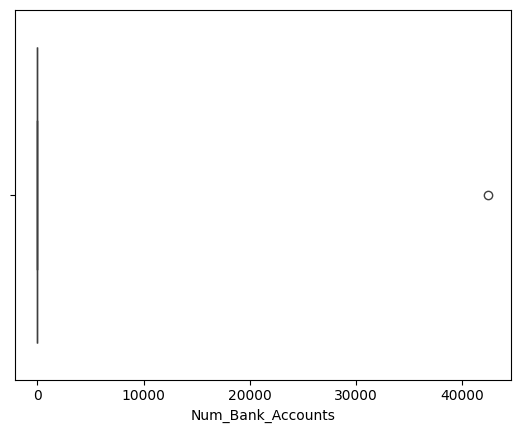

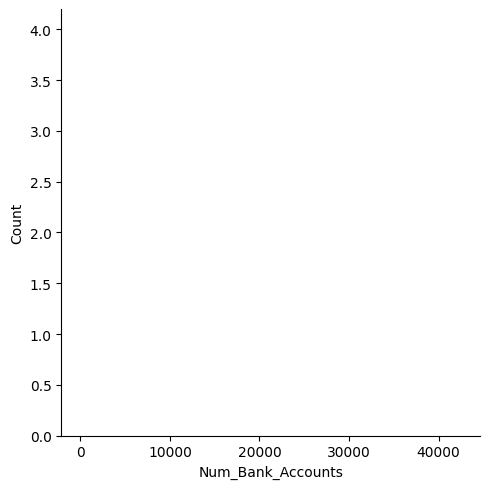

In [38]:
num_bank_accounts_analysis(credit_df["Num_Bank_Accounts"])